In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set the file path and name
file_path = r'C:\Users\micha\OneDrive\Documents\GitHub\blue-team-project-1\csv-data'
file_name = 'income_per_capita_bystate.csv'
full_path = f'{file_path}\\{file_name}'

In [3]:
# Read the CSV file into a DataFrame with explicit encoding and handling DtypeWarning
df = pd.read_csv(full_path, encoding='ISO-8859-1', dtype='str', low_memory=False)

# Inspect the columns of the DataFrame
print(df.columns)

Index(['GeoFIPS', 'State', 'Region', 'TableName', 'LineCode',
       'IndustryClassification', 'Description', 'Unit', '1969', '1970', '1971',
       '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980',
       '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', '2022'],
      dtype='object')


In [4]:
# Select only the relevant columns for the analysis (2020, 2021, 2022)
columns_of_interest = ['Description', '2020', '2021', '2022']
df_selected = df[['State'] + columns_of_interest]

In [5]:
# Filter the DataFrame to include only the specified states
states_of_interest = ['North Dakota', 'Minnesota', 'South Dakota', 'Louisiana', 'Mississippi', 'Oklahoma']
df_filtered = df_selected[df_selected['State'].isin(states_of_interest)].copy()  
df_filtered = df_filtered.loc[df_filtered["Description"] == "Per capita personal income (dollars) 4/"]
df_filtered

,State,Description,2020,2021,2022
26615,Louisiana,Per capita personal income (dollars) 4/,50243,54531,54501
31353,Minnesota,Per capita personal income (dollars) 4/,61278,66846,68840
33377,Mississippi,Per capita personal income (dollars) 4/,42513,46577,46370
47154,North Dakota,Per capita personal income (dollars) 4/,61091,65895,70360
50443,Oklahoma,Per capita personal income (dollars) 4/,50249,55165,56298
55871,South Dakota,Per capita personal income (dollars) 4/,59465,65421,68176


In [6]:
# Remove commas from the income columns and convert to numeric
df_filtered[['2020', '2021', '2022']] = df_filtered[['2020', '2021', '2022']].replace(',', '', regex=True)
df_filtered[['2020', '2021', '2022']] = df_filtered[['2020', '2021', '2022']].apply(pd.to_numeric, errors='coerce')

# Calculate the average of 2020, 2021, and 2022 columns
df_filtered['Average_Income'] = df_filtered[['2020', '2021', '2022']].mean(axis=1)

# Drop the original columns and the "Description" column
df_filtered = df_filtered.drop(['2020', '2021', '2022', 'Description'], axis=1)

# Reset the index to keep "Description" as a column
df_filtered = df_filtered.reset_index(drop=True)

# Display the resulting DataFrame
df_filtered


,State,Average_Income
0,Louisiana,53091.666667
1,Minnesota,65654.666667
2,Mississippi,45153.333333
3,North Dakota,65782.000000
4,Oklahoma,53904.000000
5,South Dakota,64354.000000


In [7]:
# Add a new column "Depression Level" based on specified criteria
df_filtered['Depression Level'] = df_filtered['State'].apply(
    lambda x: 'High' if x in ['Louisiana', 'Mississippi', 'Oklahoma'] else 'Low'
)

# Sort the DataFrame by the new column
df_filtered_sorted = df_filtered.sort_values(by='Depression Level')

# Display the resulting DataFrame
df_filtered_sorted

,State,Average_Income,Depression Level
0,Louisiana,53091.666667,High
2,Mississippi,45153.333333,High
4,Oklahoma,53904.000000,High
1,Minnesota,65654.666667,Low
3,North Dakota,65782.000000,Low
5,South Dakota,64354.000000,Low


In [8]:
# Group by 'Depression Level' and calculate the mean for each group
df_grouped = df_filtered_sorted.groupby('Depression Level').mean('Average_Income')

# Display the resulting DataFrame
df_grouped

,Average_Income
Depression Level,
High,50716.333333
Low,65263.555556


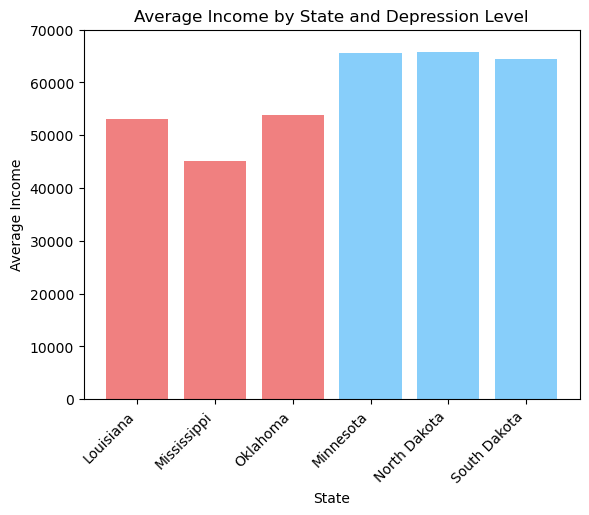

In [9]:
# Define colors based on Depression Level
colors = df_filtered_sorted['Depression Level'].map({'High': 'lightcoral', 'Low': 'lightskyblue'})

# Create a bar graph
plt.bar(df_filtered_sorted['State'], df_filtered_sorted['Average_Income'], color=colors)

# Set y-axis limits
plt.ylim(0, 70000)
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.xlabel('State')
plt.ylabel('Average Income')
plt.title('Average Income by State and Depression Level')

# Show the plot
plt.show()

In [10]:
file_path = r'C:\Users\micha\OneDrive\Documents\GitHub\blue-team-project-1\csv-data'
fn = 'state_spending_data.csv'
f_p = f'{file_path}\\{fn}'


In [11]:
df = pd.read_csv(f_p, encoding='ISO-8859-1', dtype='str', low_memory=False)

print(df.columns)

Index(['ï»¿State', 'Total (in thousands)', 'Salaries and wages',
       'Employee benefits', 'Ratio of Salary to Benefits', 'Population'],
      dtype='object')


In [12]:
# Select only the relevant columns for the analysis (2020, 2021, 2022)
coi = ['Total (in thousands)', 'Salaries and wages','Employee benefits']
df_coi = df[['ï»¿State'] + coi + ['Population']]

In [13]:
states_of_interest = ['Oklahoma', 'North Dakota', 'South Dakota', 'Mississippi', 'Minnesota', 'Louisiana']
df_filtered_coi = df_coi[df_coi.iloc[:, 0].isin(states_of_interest)].copy()
df_filtered_coi

,ï»¿State,Total (in thousands),Salaries and wages,Employee benefits,Population
18,Louisiana,8294370,4150319,2111353,4573749
23,Minnesota,11984619,7193443,2524377,5737915
24,Mississippi,4489746,2642499,939780,2939690
34,North Dakota,1759225,1049140,402335,783926
36,Oklahoma,6470669,3564499,1242558,4053824
41,South Dakota,1544738,914918,261932,919318


In [14]:
# Add a new column "Depression Level" based on specified criteria
df_filtered_coi['Depression Level'] = df_filtered_coi['ï»¿State'].apply(
    lambda x: 'High' if x in ['Louisiana', 'Mississippi', 'Oklahoma'] else 'Low'
)

# Sort the DataFrame by the new column
df_filtered_coi = df_filtered_coi.sort_values(by='Depression Level')

# Display the resulting DataFrame
df_filtered_coi

,ï»¿State,Total (in thousands),Salaries and wages,Employee benefits,Population,Depression Level
18,Louisiana,8294370,4150319,2111353,4573749,High
24,Mississippi,4489746,2642499,939780,2939690,High
36,Oklahoma,6470669,3564499,1242558,4053824,High
23,Minnesota,11984619,7193443,2524377,5737915,Low
34,North Dakota,1759225,1049140,402335,783926,Low
41,South Dakota,1544738,914918,261932,919318,Low


In [15]:
columns_to_convert = ['Total (in thousands)', 'Salaries and wages', 'Employee benefits', 'Population']
df_filtered_coi[columns_to_convert] = df_filtered_coi[columns_to_convert].astype(int)

df_filtered_coi['total_per_capita_spending'] = df_filtered_coi['Total (in thousands)'] / df_filtered_coi['Population'] * 1000
df_filtered_coi['salary_per_capita_spending'] = df_filtered_coi['Salaries and wages'] / df_filtered_coi['Population'] * 1000
df_filtered_coi['benefits_per_capita_spending'] = df_filtered_coi['Employee benefits'] / df_filtered_coi['Population'] * 1000

df_filtered_coi


,ï»¿State,Total (in thousands),Salaries and wages,Employee benefits,Population,Depression Level,total_per_capita_spending,salary_per_capita_spending,benefits_per_capita_spending
18,Louisiana,8294370,4150319,2111353,4573749,High,1813.472930,907.421680,461.624151
24,Mississippi,4489746,2642499,939780,2939690,High,1527.285530,898.903966,319.686770
36,Oklahoma,6470669,3564499,1242558,4053824,High,1596.188932,879.292984,306.515034
23,Minnesota,11984619,7193443,2524377,5737915,Low,2088.671408,1253.668449,439.946740
34,North Dakota,1759225,1049140,402335,783926,Low,2244.121256,1338.315096,513.230841
41,South Dakota,1544738,914918,261932,919318,Low,1680.308664,995.213843,284.919908


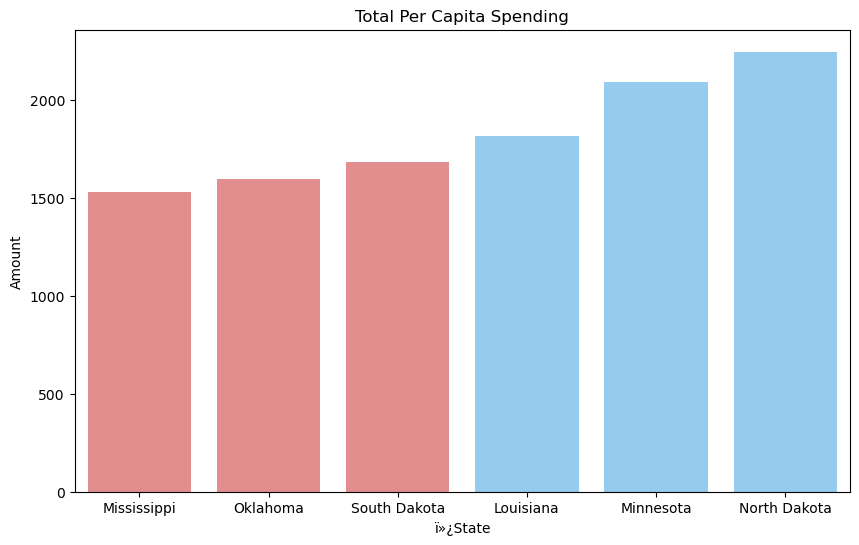

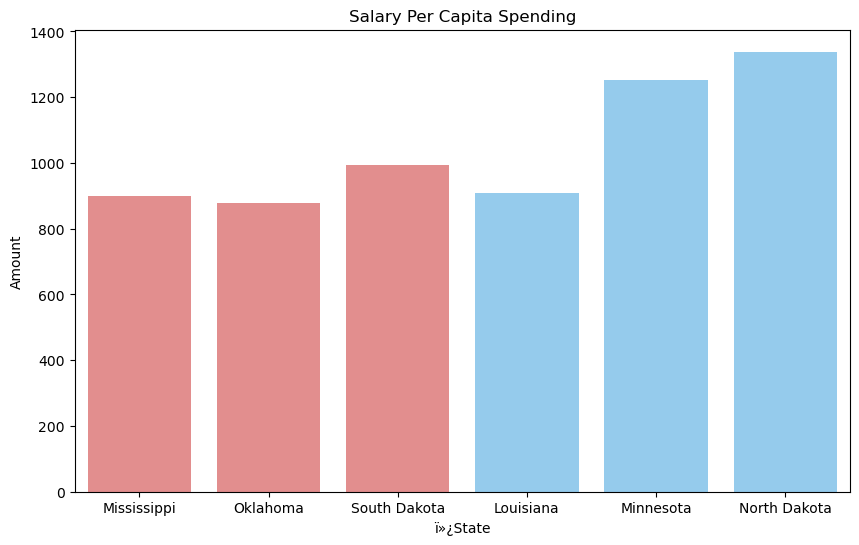

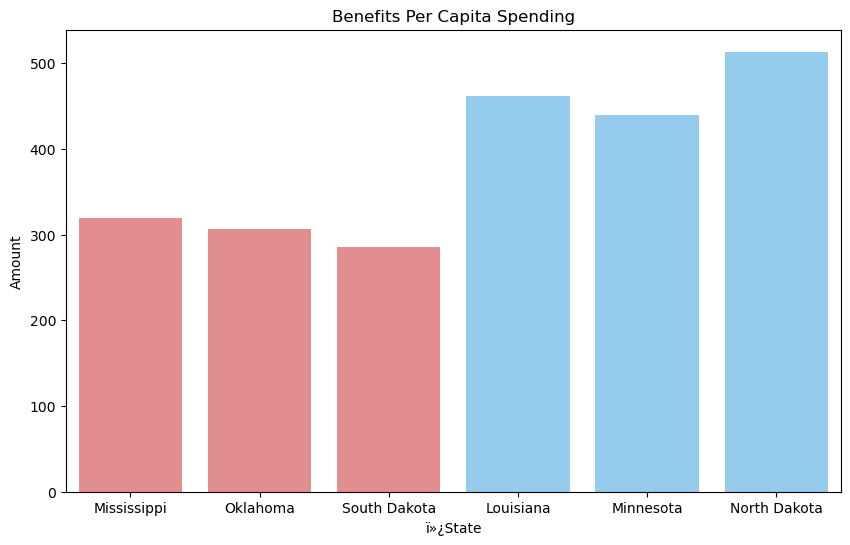

In [16]:
# Create a DataFrame for plotting
plot_df = df_filtered_coi.sort_values('total_per_capita_spending')
colors = df_filtered_sorted['Depression Level'].map({'High': 'lightcoral', 'Low': 'lightskyblue'})

# Plot total_per_capita_spending
plt.figure(figsize=(10, 6))
sns.barplot(x='ï»¿State', y='total_per_capita_spending', data=plot_df, palette=colors)
plt.title('Total Per Capita Spending')
plt.ylabel('Amount')
plt.show()

# Plot salary_per_capita_spending
plt.figure(figsize=(10, 6))
sns.barplot(x='ï»¿State', y='salary_per_capita_spending', data=plot_df, palette=colors)
plt.title('Salary Per Capita Spending')
plt.ylabel('Amount')
plt.show()

# Plot benefits_per_capita_spending
plt.figure(figsize=(10, 6))
sns.barplot(x='ï»¿State', y='benefits_per_capita_spending', data=plot_df, palette=colors)
plt.title('Benefits Per Capita Spending')
plt.ylabel('Amount')
plt.show()